# Kaggle Digit Recognizer
For my first foray into image recognition, I will utilize a neural network classifier to catagorize digits for the kaggle digit recognizer competition.

In [28]:
import time
import pandas as pd
import numpy as np
import scipy.io
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("Documents/Data-Science/kaggle-digit-recognizer/train.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
pixel_columns = [col for col in train.columns if 'pixel' in col]

In [5]:
y = train['label'].values
X = train[pixel_columns].values

In [6]:
len(X[0])

784

Actual: 2


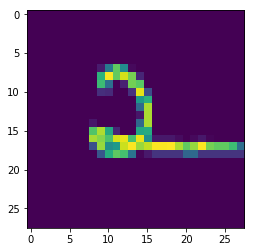

In [7]:
idx = 55
plt.figure()
plt.imshow(np.split(X[idx],28))
print('Actual: ' + str(y[idx]))  

In [8]:
np.shape(X)

(42000, 784)

Confirm y is a 1d array for samples

In [9]:
y = np.hstack(y)

Create classifier

In [38]:
def fit_my_mlpclassifier(X, y, solver):
    clf = MLPClassifier(
        hidden_layer_sizes=(25,),
        activation='logistic',
        solver=solver,
        alpha=0.5,
        max_iter=50,
        random_state=1)
    clf.fit(X,y)
    return clf

In [34]:
start = time.time()
clf_adam = fit_my_mlpclassifier(X, y, 'adam')
print(time.time()-start)

34.35164833068848


In [40]:
start = time.time()
clf_lbfgs = fit_my_mlpclassifier(X, y, 'lbfgs')
print(time.time()-start)

51.458210468292236


In [17]:
y_pred = clf.predict(X)

In [18]:
y_diff = y_pred-y

In [19]:
# Get percent of training example correctly classified
1-len(np.nonzero(y_pred-y)[0])/len(y)

0.8720238095238095

In [20]:
# Get indices for incorrectly classified training examples
np.nonzero(y_pred-y)[0]

array([   16,    19,    40, ..., 41955, 41980, 41992], dtype=int64)

## Create Learning Curve

In [67]:
27996/42000

0.6665714285714286

In [68]:
train_sizes = [1000, 2000, 3000, 6000, 10000, 15000, 20000, 27996]

In [77]:
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(25,),
    activation='logistic',
    solver='adam',
    alpha=0.5,
    max_iter=100,
    random_state=1)

In [78]:
train_sizes_abs, train_scores, test_scores = learning_curve(mlp_clf, X, y,
                                                 train_sizes=train_sizes,
                                                 cv=3)

C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, 

In [79]:
results_100_iters = [train_sizes_abs, train_scores, test_scores]

In [80]:
results_100_iters

[array([ 1000,  2000,  3000,  6000, 10000, 15000, 20000, 27996]),
 array([[0.96      , 0.964     , 0.964     ],
        [0.9685    , 0.961     , 0.961     ],
        [0.924     , 0.96233333, 0.96233333],
        [0.92966667, 0.9275    , 0.9275    ],
        [0.9165    , 0.9269    , 0.9269    ],
        [0.92573333, 0.92646667, 0.91646667],
        [0.91975   , 0.91795   , 0.92115   ],
        [0.9145235 , 0.91384483, 0.91638091]]),
 array([[0.8330477 , 0.83104729, 0.82968996],
        [0.86696658, 0.86233748, 0.86505215],
        [0.87075121, 0.88276897, 0.88326904],
        [0.88274779, 0.88812688, 0.88655522],
        [0.8916024 , 0.90148593, 0.90241463],
        [0.90445587, 0.90755822, 0.89619946],
        [0.90766924, 0.90491499, 0.90348621],
        [0.90159954, 0.90212888, 0.90870124]])]

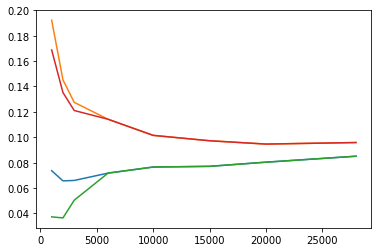

In [81]:
plt.figure()
plt.plot(results_50_iters[0], 1-results_50_iters[1].mean(1))
plt.plot(results_50_iters[0], 1-results_50_iters[2].mean(1))
plt.plot(results_100_iters[0], 1-results_100_iters[1].mean(1))
plt.plot(results_100_iters[0], 1-results_100_iters[2].mean(1))

In [55]:
train_scores.mean(1)

array([0.9306    , 0.93873333])

In [ ]:
idx = 55
plt.figure()
plt.imshow(np.split(X[idx],28))
print('Actual: ' + str(y[idx]))  

# Error analysis

View all actual 1s which were misclassified

In [87]:
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(25,),
    activation='logistic',
    solver='adam',
    alpha=0.5,
    max_iter=50,
    random_state=1)

In [88]:
clf = mlp_clf.fit(X, y)

In [89]:
y_pred = clf.predict(X)
y_diff = y_pred-y
# Get percent of training example correctly classified
1-len(np.nonzero(y_pred-y)[0])/len(y)

0.9165238095238095

In [21]:
clf = MLPClassifier(
    hidden_layer_sizes=(25,),
    activation='logistic',
    solver='adam',
    alpha=0.5,
    max_iter=100,
    random_state=1)

clf.fit(X,y)


C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.8714285714285714

In [150]:
# Get indices for incorrectly classified "actual 1" training examples
mc1_idx = np.nonzero((y_pred!=1) & (y==1))[0]

In [151]:
len(mc1_idx)

163

In [157]:
tp1_idx = np.nonzero((y_pred==1) & (y==1))[0] 

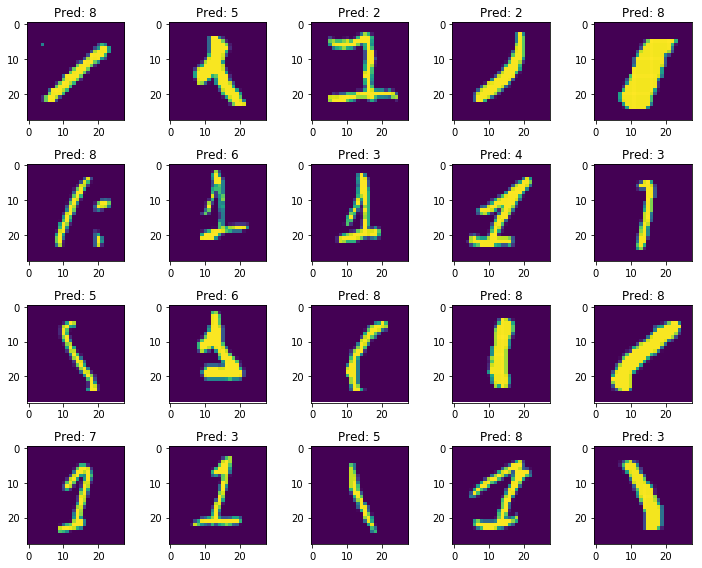

In [159]:
# Show image of training example as well as 
# the predicted and actual values for the training example
sqrt_misses = np.floor(np.sqrt(len(mc1_idx)))
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.figure()
for i in list(range(1,4*5+1)):
    plt.subplot(4, 5, i)
    training_example = mc1_idx[i]
    
    plt.imshow(np.split(X[training_example],28))
    plt.title('Pred: ' + str(y_pred[training_example]))
    
plt.tight_layout()
    #print(
    #print('Actual: ' + str(y[training_example]))

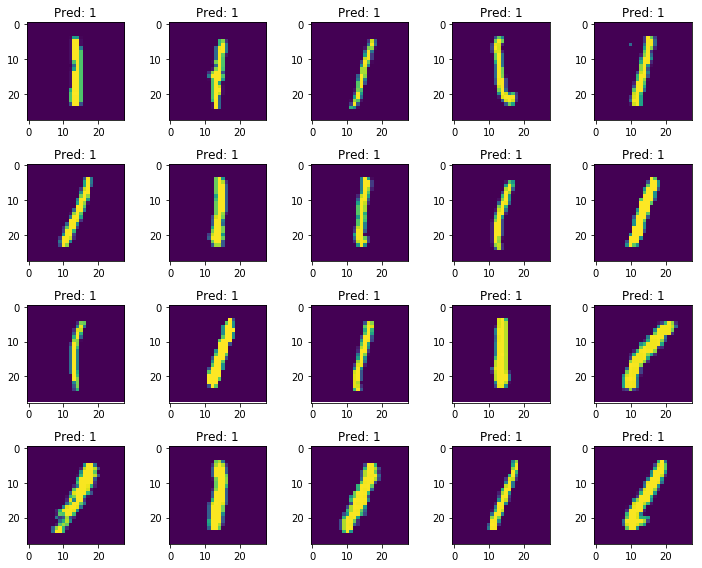

In [160]:
# Show image of training example as well as 
# the predicted and actual values for the training example
sqrt_makes = np.floor(np.sqrt(len(tp1_idx)))
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.figure()
for i in list(range(1,4*5+1)):
    plt.subplot(4, 5, i)
    training_example = tp1_idx[i]
    
    plt.imshow(np.split(X[training_example],28))
    plt.title('Pred: ' + str(y_pred[training_example]))
    
plt.tight_layout()
    #print(
    #print('Actual: ' + str(y[training_example]))

In [162]:
from sklearn.metrics import confusion_matrix

In [163]:
confusion_matrix(y, y_pred)

array([[4033,    0,   11,   11,   17,   18,   21,    0,   16,    5],
       [   1, 4521,   24,   24,    5,   27,    8,    9,   54,   11],
       [  52,   14, 3718,   59,   75,   11,   46,   60,  128,   14],
       [  41,   10,  113, 3770,    3,  219,   13,   54,   93,   35],
       [  11,   11,   15,    0, 3787,   10,   34,    3,    9,  192],
       [ 124,    9,   13,  112,   44, 3286,   40,    6,  121,   40],
       [  71,   15,   18,    0,   64,   88, 3846,    0,   30,    5],
       [  52,   31,   45,   21,   59,    6,    2, 4019,   10,  156],
       [  34,   42,   26,   99,   21,   82,   19,   21, 3662,   57],
       [  39,    8,    6,   35,  127,   22,    2,   48,   49, 3852]],
      dtype=int64)

### Takeaways
- A neural network classifier does okay, but actually gets many examples wrong
- A convolutional neural network classifier would perform better since it retains the information regarding pixel positions. I will use a CNN classifier for the next version of the classifier.
- On the bright side, I now know why convolutional neural networks are used for image processing!